In [19]:
import pandas as pd

In [21]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/CollegePlacement.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Python           200 non-null    float64
 1   DeepLearning     200 non-null    float64
 2   MachineLearning  200 non-null    float64
 3   BigData          200 non-null    float64
 4   CloudComputing   200 non-null    float64
 5   Placement        200 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


In [23]:
df.head()

,Python,DeepLearning,MachineLearning,BigData,CloudComputing,Placement
0,0.80,0.57,0.63,0.50,0.34,Yes
1,0.81,0.90,0.62,0.71,0.92,No
2,0.49,0.69,0.62,0.64,0.41,No
3,0.40,0.94,0.60,0.26,0.47,No
4,0.31,0.87,1.00,0.23,0.99,No


In [24]:
df.describe()

,Python,DeepLearning,MachineLearning,BigData,CloudComputing
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.514100,0.495850,0.514350,0.495150,0.474950
std,0.305749,0.290694,0.285211,0.292463,0.281686
min,0.000000,0.010000,0.000000,0.010000,0.000000
25%,0.237500,0.227500,0.267500,0.240000,0.227500
50%,0.545000,0.490000,0.540000,0.500000,0.485000
75%,0.800000,0.740000,0.770000,0.740000,0.702500
max,1.000000,1.000000,1.000000,1.000000,0.990000


In [25]:
df.columns

Index(['Python', 'DeepLearning', 'MachineLearning', 'BigData',
       'CloudComputing', 'Placement'],
      dtype='object')

In [29]:
df.shape

(200, 6)

In [35]:
# Convert categorical target variable to numerical
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

X = df[['Python', 'DeepLearning', 'MachineLearning', 'BigData', 'CloudComputing']]
y = df['Placement']

In [36]:
X.shape

(200, 5)

In [31]:
y.shape

(200,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)


In [39]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
model.intercept_

0.3754832757610693

In [42]:
model.coef_

array([-0.06326511, -0.05022655,  0.2495637 ,  0.28402525,  0.03330338])

In [43]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
mean_absolute_percentage_error(y_test,y_pred)

1148971401336906.0

In [47]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
mean_squared_error(y_test,y_pred)

0.25242491104938397

In [48]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mean_absolute_error(y_test,y_pred)

0.4775751112880868

Mean Squared Error: 0.25242491104938397
R^2 Score: -0.03526433491691283


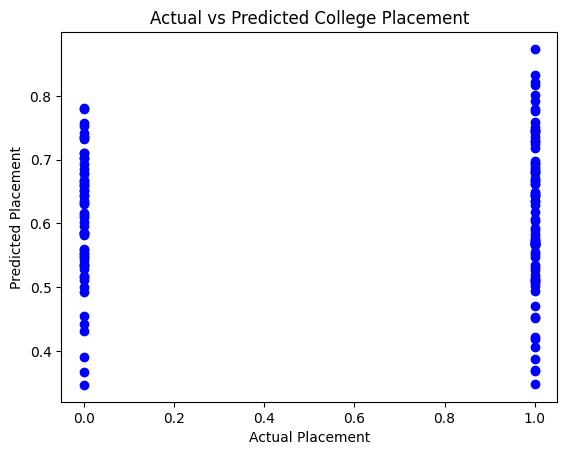

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Placement')
plt.ylabel('Predicted Placement')
plt.title('Actual vs Predicted College Placement')
plt.show()

